# Repaso error estandar

$$T = (x_1 + x_2 + x_3 + ... + x_n)$$

$$Var(T) = (Var(x_1) + Var(x_2) + Var(x_3) + ... + Var(x_n))$$

$$Var(T) = n\sigma^2 $$

$$\mu = \frac{T}{n} $$

Varianza de la media

$$Var(\mu) = Var(\frac{T}{n}) = \frac{1}{n^2} Var(T) = \frac{1}{n^2} n\sigma^2 = \frac{\sigma^2}{n}$$

$$SE = \frac{\sigma}{\sqrt{n}} $$

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("weight-height.csv")
df = pd.read_csv('weight-height.csv')
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)


¿Cuál es la desviación estandard de la edad?

In [28]:
df['IMC'] = df['Weight'] / (df['Height']**2)

¿Cuál es el error estandard e la media de la estatura?

$$SE = \frac{\sigma}{\sqrt{n}}$$

In [4]:
np.std(df.Height)

0.09781115743615636

In [5]:
# Que tan diferente es el promedio de mi dataset contra otro el promedio de otro dataset (Error estándar)
df.Height.std() / np.sqrt(len(df))

0.0009781604836085057

### Muestras con remplazo

In [6]:
edad = [21, 20, 21, 21, 23, 23, 21, 20, 21, 21, 20, 21, 20, 21, 21, 21, 21, 23, 20, 23, 21, 22]

df = pd.DataFrame()
df['edad'] = edad
df

,edad
0,21
1,20
2,21
3,21
4,23
5,23
6,21
7,20
8,21
9,21


In [11]:
# Replace, se repiten
df.sample(len(df), replace = True).mean()

edad    21.045455
dtype: float64

## Realiza bootstrap  de la estatura


In [17]:
promedios = []
n = 10000
for i in range(n):
    promedios.append(df.sample(len(df), replace = True).mean()[0]) 

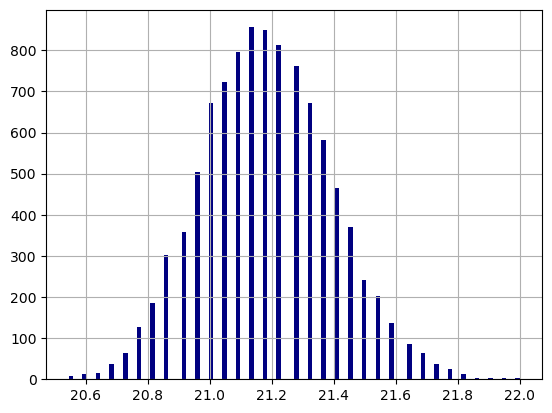

In [19]:
plt.hist(promedios, bins = 100, color = 'navy')
plt.grid()

In [20]:
np.std(promedios)

0.20950132921332207

In [24]:
se_edad = np.std(edad) / np.sqrt(len(edad))

In [25]:
# Cola inferior y superior
np.mean(edad) - 2*se_edad

20.76252393738956

In [26]:
# Cola superior
np.mean(edad) + 2*se_edad

21.601112426246807

In [24]:
# No es lo mismo

In [3]:
# No es una distribución normal


### Realiza bootstrap de la altura

¿Con un 95% de confianza, la media del salón se encuntra entre?

In [ ]:
# muestras con reemplazo, usas muchas y obtienes estadísticas

### Ahora del IMC 

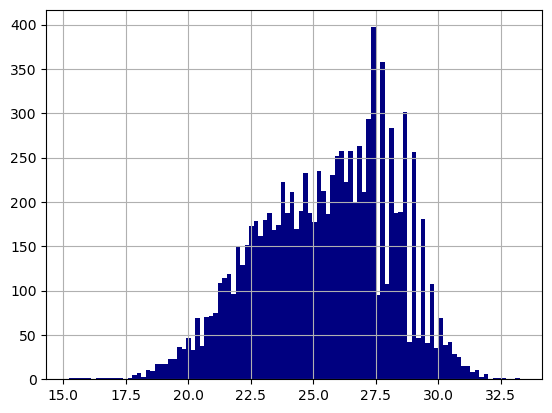

In [30]:
plt.hist(df['IMC'], bins = 100, color = 'navy')
plt.grid()

In [36]:
promedios_imc = []
n = 10000
for i in range(n):
    promedios_imc.append(df['IMC'].sample(len(df), replace = True).mean())

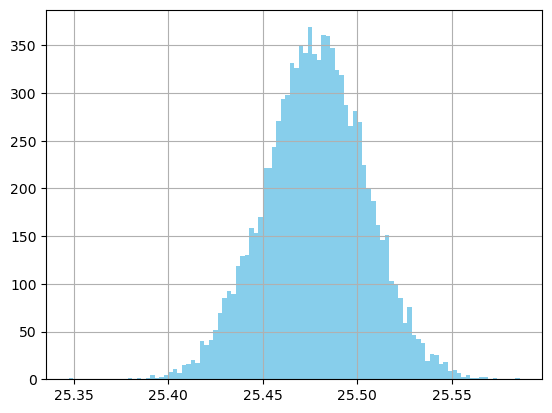

In [37]:
plt.hist(promedios_imc, bins = 100, color = 'skyblue')
plt.grid()

In [40]:
desviaciones_imc = []
n = 10000
for i in range(n):
    desviaciones_imc.append(df['IMC'].sample(len(df), replace = True).std())

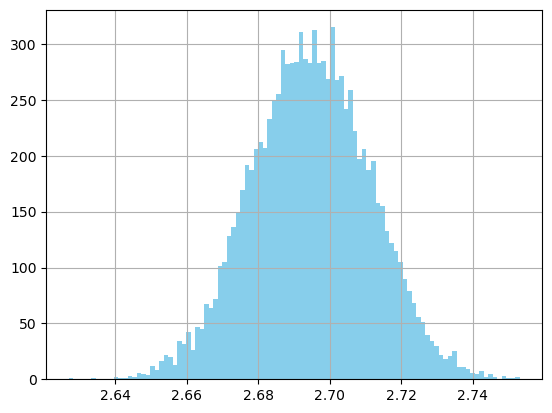

In [41]:
plt.hist(desviaciones_imc, bins = 100, color = 'skyblue')
plt.grid()

In [42]:
df1 = pd.DataFrame()
df1['desviaciones'] = desviaciones_imc

In [43]:
np.mean(df1.desviaciones > 2.72)

0.0638

A esto se le conoce resampleo boostrap 

<img style="margin: 15px 15px 15px 15px;" src="https://blogs.sas.com/content/iml/files/2018/12/bootstrapSummary.png" width="3000px" height="100px" />


<img style="margin: 15px 15px 15px 15px;" src="https://uc-r.github.io/public/images/analytics/bootstrap/bootstrap.png" width="3000px" height="100px" />


# Aplicación en la bolsa

In [58]:
# Get tickers 
import yfinance as yf
tickers = ['VTI', 'AMZN']
start_date = '2015-10-01'
end_date = "2022-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()
returns.head()

[*********************100%%**********************]  2 of 2 completed


,AMZN,VTI
Date,,
2015-10-02,0.022699,0.014557
2015-10-05,0.020919,0.018434
2015-10-06,-0.011404,-0.003229
2015-10-07,0.008298,0.009030
2015-10-08,-0.016201,0.008658


# Desviación estandard de Amazon 

In [59]:
vol_amzn = np.std(returns['AMZN'])
vol_amzn

0.02067058304033696

# Error estandard Amazon

In [60]:
error_amzn = returns['AMZN'].sem()
error_amzn

0.00044620852953538794

# Boostrap de la volatilidad de Amazon 

In [61]:
volatilidades_amzn = []
for i in range(10000):
    volatilidades_amzn.append(returns['AMZN'].sample(len(returns), replace = True).std())

In [62]:
df_volatilidades_amzn = pd.DataFrame()
df_volatilidades_amzn['vol'] = volatilidades_amzn

¿Cuál es la probabilidad de que la volatilidad de amazon sea menor al 2%?

In [63]:
(df_volatilidades_amzn['vol'] < 0.02).mean()

0.1313

# Boostrap de la correlación entre Amazon y VTI 

In [64]:
corr_amzn = []
for i in range(10000):
    corr_amzn.append(returns.sample(len(returns), replace = True).corr()['AMZN']['VTI'])

In [66]:
df_corr_amzn = pd.DataFrame()
df_corr_amzn['corr_amzn'] = corr_amzn

In [67]:
df_corr_amzn.describe()

,corr_amzn
count,10000.000000
mean,0.630404
std,0.021100
min,0.551276
25%,0.616516
50%,0.630713
75%,0.644655
max,0.706348


In [70]:
np.mean(df_corr_amzn.corr_amzn > 0.6)

0.9212

# Aplicación de la vida real

A las empresas que prestan dinero no les interesa tanto el porcentaje de pago sino a algo que se conoce como _loss rate_.

El _loss rate es_:

$$LR =1 -  \frac{\sum{Capital_i}}{\sum{Prestado_i}} $$


In [44]:
df = pd.DataFrame()
df['monto'] = [2000, 3000, 1000, 5000, 1000, 7000, 4000]
df['pago'] = [0, 1, 0, 1, 0, 1, 1]
df

,monto,pago
0,2000,0
1,3000,1
2,1000,0
3,5000,1
4,1000,0
5,7000,1
6,4000,1


In [45]:
# Calcula el loss rate
1 - (df.monto * df.pago).sum() / df.monto.sum()

0.17391304347826086

In [47]:
# Calcula la morosidad
1 - np.mean(df.pago)

0.4285714285714286

Se desarrolla un nuevo modelo que ayuda a discriminar mejor, el modelo va a rechazar clientes

In [48]:
df['acepta'] =  [1, 1, 0, 1, 1, 1, 0]

In [49]:
df

,monto,pago,acepta
0,2000,0,1
1,3000,1,1
2,1000,0,0
3,5000,1,1
4,1000,0,1
5,7000,1,1
6,4000,1,0


In [50]:
# Cacua el nuevo loss rate
df1 = df.query('acepta == 1')

1 - (df1.monto * df1.pago).sum() / df1.monto.sum()

0.16666666666666663

¿Cuál es la prbobabilidad que el loss rate sea mayor a 40%?

In [53]:
n = 10000
losses = []
for i in range(n):
    sample_df = df1.sample(len(df1), replace = True)
    lr = 1 - (sample_df.monto * sample_df.pago).sum() / sample_df.monto.sum()
    losses.append(lr)

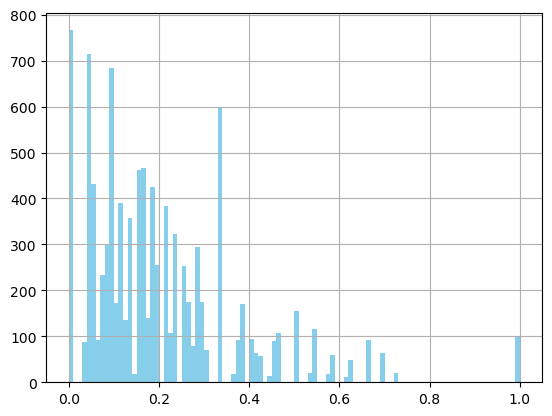

In [54]:
plt.hist(losses, bins = 100, color = 'skyblue')
plt.grid()

In [56]:
# Probabilidad mayor a 40%
df_losses = pd.DataFrame()
df_losses['loss_rate'] = losses

np.mean(df_losses.loss_rate > 0.4)

0.1039

In [57]:
# Probabilidad menor a 15%
np.mean(df_losses.loss_rate < 0.15)

0.438